In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold

In [2]:
df = pd.read_csv('../../Datasets/Social_Network_Ads.csv')

df.drop('User ID', axis=1, inplace=True)
df.head(5)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [3]:
df.Gender = pd.get_dummies(df.Gender, drop_first=True)

In [4]:
X = df.to_numpy()

In [5]:
a = np.array([1, 2, 3, 4, 5, 6])
b = a ** 2

In [48]:
np.random.permutation(400)

array([ 38, 128, 389, 116, 186, 342,  48,  67,   7,  36, 365, 327,  83,
         3, 171, 297, 201, 255,  26,   4, 293, 204, 103, 330, 275, 190,
       148,  81, 268,  19,  30, 248, 262, 216, 351, 281, 168,  61,  27,
        34,  95, 133, 160, 194, 140,  64, 150, 243,  68, 335,  33, 374,
       329, 217, 191, 142, 382, 151,   2, 291, 167, 306, 383, 286,  78,
        56,  15, 225, 359,  43, 264, 290,  84, 244, 289,  22,  93, 164,
        66, 280,   9, 192, 277, 124, 337, 361, 256, 110,   8, 198, 112,
        35, 274, 159, 395, 246, 349, 333, 101,  37, 380, 288, 260,  72,
       391, 276, 338, 213, 119,  79, 241, 122, 155,  96, 199,  82, 215,
       129, 143,  40, 295, 308, 153,  29, 398, 261, 178, 187,  23, 392,
        94, 287, 123, 184,  18, 362, 174, 177, 303, 240, 113, 226, 311,
       319, 197, 364, 203,  69,  52,  39, 220, 355, 179, 340,  14, 302,
       328, 234, 326, 239,  51, 381, 304,  73, 214, 320, 263, 141, 345,
        75,  63,  49,  60,  76, 106, 224, 273, 363, 145,  53, 19

In [6]:
np.random.seed = 0
X = X[np.random.permutation(X.shape[0])]

In [7]:
y = X[:, -1]
X = X[:, :-1]

In [8]:
X = (X - X.mean(axis=0)) / X.std(axis=0)

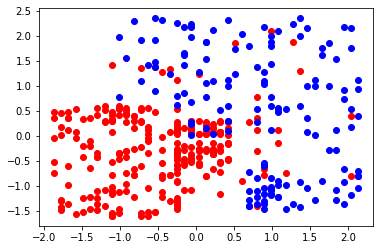

In [9]:
plt.plot(X[y == 0, 1], X[y == 0, 2], 'ro')
plt.plot(X[y == 1, 1], X[y == 1, 2], 'bo')

# KFold

In [46]:
train_score = 0
val_score = 0

s = KFold(n_splits=5)
for z in s.split(X, y):
    train_x = X[z[0]]
    train_y = y[z[0]]
    
    val_x = X[z[1]]
    val_y = y[z[1]]
    
    clf = LogisticRegression()
    clf.fit(train_x, train_y)
    
    train_score += clf.score(train_x, train_y)
    val_score += clf.score(val_x, val_y)
    
    
print(train_score / 5)
print(val_score / 5)
#############
# 1 2 3 4 5
# train = 2, 3, 4, 5 # test = 1
# train = 1, 3, 4, 5 # test = 2
# train = 2, 1, 4, 5 # test = 3
# train = 2, 3, 1, 5 # test = 4
# train = 2, 3, 4, 1 # test = 5

0.85
0.8175000000000001


In [50]:
from sklearn.preprocessing import PolynomialFeatures

In [11]:
X_poly = PolynomialFeatures(degree=5).fit_transform(X)

In [56]:
for p in [1, 2, 3, 4, 5]:
    X_poly = PolynomialFeatures(degree=p).fit_transform(X)
    
    train_score = 0
    val_score = 0

    s = KFold(n_splits=5)
    for z in s.split(X_poly, y):
        train_x = X_poly[z[0]]
        train_y = y[z[0]]

        val_x = X_poly[z[1]]
        val_y = y[z[1]]

        clf = LogisticRegression(max_iter=1000)
        clf.fit(train_x, train_y)

        train_score += clf.score(train_x, train_y)
        val_score += clf.score(val_x, val_y)


    print(p)
    print(train_score / 5)
    print(val_score / 5)
    print('--------------')

/home/mqod/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mqod/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

8
0.9362499999999999
0.86
--------------
4
0.9237500000000001
0.8875
--------------
2
0.9049999999999999
0.885
--------------
5
0.92875
0.8825
--------------
6
0.9293750000000001
0.8649999999999999
--------------


In [57]:
for c in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    train_score = 0
    val_score = 0
    s = KFold(n_splits=5)
    
    for z in s.split(X, y):
        train_x = X_poly[z[0]]
        train_y = y[z[0]]

        val_x = X_poly[z[1]]
        val_y = y[z[1]]

        clf = LogisticRegression(C=c)
        clf.fit(train_x, train_y)

        train_score += clf.score(train_x, train_y)
        val_score += clf.score(val_x, val_y)
    
    
    print('C = ', c)
    print(train_score / 5)
    print(val_score / 5)
    print('------------------')

C =  0.0001
0.7706250000000001
0.7525000000000001
------------------
C =  0.001
0.82125
0.79
------------------
C =  0.01
0.8825
0.8399999999999999
------------------


/home/mqod/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mqod/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C =  0.1
0.914375
0.875
------------------


/home/mqod/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mqod/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C =  1
0.9293750000000001
0.8675
------------------


/home/mqod/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mqod/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C =  10
0.9331250000000001
0.8625
------------------


/home/mqod/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mqod/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C =  100
0.931875
0.8574999999999999
------------------


/home/mqod/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mqod/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C =  1000
0.930625
0.8625
------------------


/home/mqod/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
clf = LogisticRegression()
clf.fit(X_poly, y)
print(clf.coef_)

[[-0.35657937  0.05347928  0.65919102  1.11244233 -0.35443977 -0.09163244
   0.25317082 -0.01185313 -0.4097456   0.77866739  0.03929886  0.65552499
   1.12257119 -0.4236306   0.41957538  0.084494    0.26322028 -0.26621075
   0.56511196 -0.79383676 -0.3528675  -0.06540619  0.29808265 -0.02880175
  -0.39295923  0.78204782  0.24777692  0.13279733  0.19075683 -0.40090245
  -0.15759151 -0.15964752  0.26099718 -0.94241437 -0.4475832   0.02518133
   0.65290822  1.13449688 -0.4247829   0.40385387  0.11578218  0.27313334
  -0.2608978   0.57274376 -0.80987607  0.36413393  0.07652868  0.56890979
  -0.72065419  0.08097977  0.04847854  0.42485216  0.2305003  -0.02578743
  -0.11999181  0.42148414]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
##
# w ** 2 => 10 -> 11 => +21
# w ** 2 => 1 -> 2 => +3
# w ** 2 => 0.01 => 
# 2 2 => 90% Ridge

clf = Ridge(alpha=1)
clf.fit(X_poly, y)
print(clf.coef_)

[ 0.          0.00496369  0.08917116  0.14942801  0.00019859 -0.0022499
  0.02922085  0.09080721 -0.00966254  0.19515796  0.00497164  0.08908115
  0.15059708 -0.01612163  0.01965814  0.01004205  0.02393204 -0.14486273
  0.01873018 -0.09754844  0.00039749  0.00131406  0.03524594  0.09016222
 -0.00887605  0.19555972 -0.00114051 -0.007745    0.01334889 -0.0260779
 -0.02364696  0.00971281 -0.02322862 -0.04626756 -0.08653326  0.00498754
  0.08913372  0.1520072  -0.01251442  0.01930303  0.017866    0.02388641
 -0.14517259  0.01926425 -0.09859177  0.00828744 -0.00481352  0.00600369
 -0.02280311 -0.00203158 -0.01565783  0.04757605 -0.01167496  0.04175669
 -0.00048623  0.04105424]


In [23]:
# |w|
# 0 3 => 90% Lasso

clf = Lasso(alpha=1)
clf.fit(X_poly, y)
print(clf.coef_)

[ 0.         -0.          0.          0.         -0.         -0.
 -0.          0.         -0.          0.         -0.          0.
  0.         -0.         -0.         -0.          0.          0.
  0.          0.         -0.         -0.         -0.          0.
 -0.          0.         -0.         -0.         -0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.          0.         -0.         -0.         -0.          0.
  0.          0.          0.         -0.         -0.         -0.
 -0.         -0.          0.00961015  0.          0.          0.
  0.          0.00700848]


# train test split

In [13]:
split = int(X.shape[0] * 0.8)

In [14]:
X_train = X[:split]
X_test = X[split:]

y_train = y[:split]
y_test = y[split:]

In [15]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [16]:
clf = LogisticRegression(verbose=1)

In [17]:
clf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(verbose=1)

# Accuracy

In [67]:
print('test score:', clf.score(X_test, y_test))
print('train score:', clf.score(X_train, y_train))

test score: 0.7375
train score: 0.846875


In [59]:
h_train = clf.predict(X_train)
print('ACC =', np.mean(h_train == y_train))

ACC = 0.871875


In [68]:
from sklearn.metrics import accuracy_score

h_train = clf.predict(X_train)

accuracy_score(y_train, h_train)

0.846875

In [76]:
mat = np.array([[0, 0], [0, 0]])

for i in range(h_train.shape[0]):
    if h_train[i] == 1 and y_train[i] == 1:
        #TP
        mat[0, 0] += 1
    elif h_train[i] == 0 and y_train[i] == 1:
        #FN
        mat[1, 0] += 1
    elif h_train[i] == 1 and y_train[i] == 0:
        #FP
        mat[0, 1] += 1
    elif h_train[i] == 0 and y_train[i] == 0:
        #TN
        mat[1, 1] += 1

mat

array([[ 57,  14],
       [ 35, 214]])

# Precision

In [78]:
from sklearn.metrics import precision_score

h_train = clf.predict(X_train)
h_test = clf.predict(X_test)

print('test precision:', precision_score(y_test, h_test))
print('train precision:', precision_score(y_train, h_train))

# TP / (TP + FP)

test precision: 0.96875
train precision: 0.8028169014084507


# Recall

In [79]:
from sklearn.metrics import recall_score

h_train = clf.predict(X_train)
h_test = clf.predict(X_test)

print('test recall:', recall_score(y_test, h_test))
print('train recall:', recall_score(y_train, h_train))

# TP / (TP + FN)

test recall: 0.6078431372549019
train recall: 0.6195652173913043


In [ ]:
h_train = clf.predict(X_train)
h_test = clf.predict(X_test)

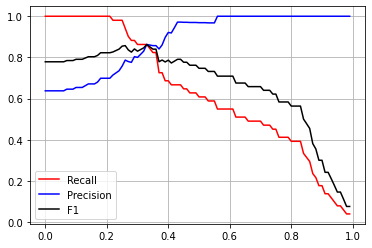

In [109]:
from sklearn.metrics import f1_score

test_recalls = []
test_precision = []
f1 = []

for th in np.arange(0, 1, 0.01):
    h_train = clf.predict_proba(X_train)[:, 1] > th
    h_test = clf.predict_proba(X_test)[:, 1] > th

    test_recalls.append(recall_score(y_test, h_test))
    test_precision.append(precision_score(y_test, h_test))
    f1.append(f1_score(y_test, h_test))
    
    # print('train precision:', precision_score(y_train, h_train))
    # print('train recall:', recall_score(y_train, h_train))
    
plt.plot(np.arange(0, 1, 0.01), test_recalls, 'r-', label='Recall')
plt.plot(np.arange(0, 1, 0.01), test_precision, 'b-', label='Precision')
plt.plot(np.arange(0, 1, 0.01), f1, 'k-', label='F1')
plt.legend()
plt.grid()

Text(0, 0.5, 'R')

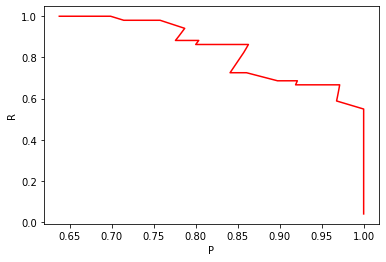

In [118]:
plt.plot(test_precision, test_recalls, 'r-')
plt.xlabel('P')
plt.ylabel('R')

In [115]:
h_train = clf.predict_proba(X_train)[:, 1] > 0.33
h_test = clf.predict_proba(X_test)[:, 1] > 0.33

print(recall_score(y_test, h_test))
print(accuracy_score(y_test, h_test))
print(precision_score(y_test, h_test))
print(f1_score(y_test, h_test))

0.8627450980392157
0.825
0.8627450980392157
0.8627450980392157


# F1-score

In [81]:
from sklearn.metrics import f1_score

h_train = clf.predict(X_train)
h_test = clf.predict(X_test)

print('test f1-score:', f1_score(y_test, h_test))
print('train f1-score:', f1_score(y_train, h_train))

test f1-score: 0.7469879518072288
train f1-score: 0.6993865030674846


# ROC - AUC

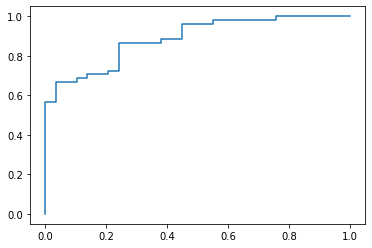

In [121]:
from sklearn.metrics import roc_curve

res = roc_curve(y_test, h_test)

plt.plot(res[0], res[1])

In [119]:
from sklearn.metrics import roc_auc_score

h_test = clf.predict_proba(X_test)[:, 1]
h_train = clf.predict_proba(X_train)[:, 1]

print('test ROC-AUC:', roc_auc_score(y_test, h_test))
print('train ROC-AUC:', roc_auc_score(y_train, h_train))

test ROC-AUC: 0.8864097363083164
train ROC-AUC: 0.9245089626239512


In [122]:
models = [
            LogisticRegression(class_weight='balanced'),
            LogisticRegression(C=0.01),
            LogisticRegression(C=1),
            LogisticRegression(C=10)
         ]

for model in models:
    model.fit(X_train, y_train)
    h_test = model.predict_proba(X_test)[:, 1]
    
    print(roc_auc_score(y_test, h_test))

0.9080459770114944
0.8782961460446248
0.8864097363083164
0.8884381338742394


In [123]:
from sklearn.model_selection import learning_curve

clf = LogisticRegression(class_weight='balanced')

train_sizes, train_score, test_score = learning_curve(clf, X_train, y_train, cv=5,
                                                      train_sizes=np.arange(0.1, 1.001, 0.01))

/home/mqod/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/mqod/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/mqod/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1374, in fit
    raise ValueError("This solver needs samples of at least 2 classes"
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/mqod/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. 

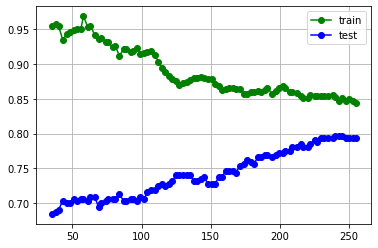

In [124]:
plt.plot(train_sizes, train_score.mean(axis=1), 'go-', label='train')
plt.plot(train_sizes, test_score.mean(axis=1), 'bo-', label='test')
plt.legend()
plt.grid()

/home/mqod/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mqod/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

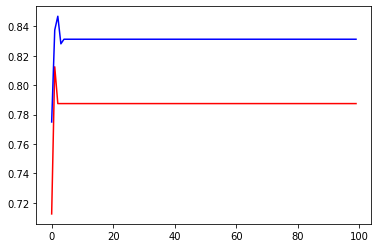

In [132]:
clf = LogisticRegression(class_weight='balanced', max_iter=1, warm_start=True)


test_scores = []
train_scores = []

for itter in range(100):
    clf.fit(X_train, y_train)
    
    test_scores.append(clf.score(X_test, y_test))
    train_scores.append(clf.score(X_train, y_train))
    
plt.plot(test_scores, 'r-')
plt.plot(train_scores, 'b-')

In [47]:
clf = LogisticRegression(penalty='l1', C=10, solver='liblinear')

In [48]:
clf.fit(X_train, y_train)

LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [49]:
clf.coef_

array([[0.21553239, 2.65292621, 1.49638701]])